In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import h5py
import tensorflow as tf

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
keras.backend.image_data_format()

'channels_first'

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(-1, 1, 28, 28)
x_test = x_test.reshape(-1, 1, 28, 28)

In [8]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Sequential

In [9]:
import keras.backend.tensorflow_backend as tfback

In [10]:
def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus

In [11]:
lenet = Sequential()
lenet.add(Conv2D(6, kernel_size=3, strides=1, padding='same', input_shape=(1, 28, 28), activation="relu", \
                name='conv1', data_format="channels_first"))

lenet.add(MaxPool2D(pool_size=2, strides=2, name='pool1', data_format='channels_first'))

lenet.add(Conv2D(16, kernel_size=5, strides=1, padding='valid', activation="relu", \
                 name='conv2', data_format="channels_first"))

lenet.add(MaxPool2D(pool_size=2, strides=2, name='pool2', data_format="channels_first"))
lenet.add(Flatten(name='flatten', data_format="channels_last"))
lenet.add(Dense(120, activation="relu", name='fc1'))
lenet.add(Dense(84, activation="relu", name='fc2'))
lenet.add(Dense(10, activation='softmax', name='softmax'))

In [12]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 6, 28, 28)         60        
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 6, 14, 14)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 10, 10)        2416      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 16, 5, 5)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 120)               48120     
_________________________________________________________________
fc2 (Dense)                  (None, 84)               

In [13]:
lenet.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# lenet.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=[x_test, y_test])

In [15]:
# lenet.save('LeNet_NCHW2.h5')

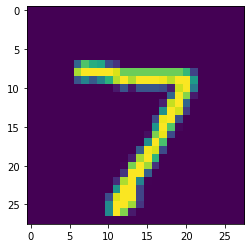

In [16]:
plt.imshow(x_test[0][0])

In [17]:
lenet.load_weights('LeNet_NCHW2.h5')

In [18]:
image_7 = np.expand_dims(x_test[0], axis=0)
pred = lenet.predict(image_7)

In [19]:
result = np.where(pred == np.amax(pred))[1][0]
result

7

In [20]:
for i in pred[0]:
    print(str(i))

4.1750793e-13
1.0217871e-07
4.7025295e-09
7.902746e-09
4.6409793e-11
4.0204432e-14
3.606683e-20
0.9999999
5.8345616e-12
4.146057e-10


In [23]:
print("[INFO] evaluating...")
(loss, accuracy) = lenet.evaluate(x_test, y_test, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

[INFO] evaluating...
10000/10000 [==============================] - 1s 105us/step
[INFO] accuracy: 98.57%


In [21]:
# Write Test Images to file
with open("test_set_in.dat","w") as f:
    for i in image_2[0]:
        for j in i:
            for k in j:
                f.write(str(k)+"\n")

In [22]:
x_test.shape

(10000, 1, 28, 28)

In [23]:
image_id=0
cnt_col=0
cnt_row=0
with open("test_set_in.dat","w") as f:
    for img in range(x_test.shape[0]):
        f.write("\n"+"const IMAGE_TYPE test_" + str(image_id) + "[IMG_CH][IMG_X][IMG_Y] = { \n \t{\n")
        cnt_row=0
        for i in x_test[image_id][0]:
            cnt_row+=1
            cnt_col=0
            f.write("\t\t{ ")
            for j in i:
                cnt_col+=1
                f.write(str(j))
                if(not(cnt_col==28)):
                    f.write(", ")
                else:
                    f.write(" },\n")
        f.write(" \t}\n };\n")
        image_id+=1

In [24]:
np.where(y_test[0]==1)[0][0]

7

In [25]:
with open("test_set_out.dat","w") as f:
    for y in y_test:
        f.write(str(np.where(y==1)[0][0]) + "\n")

In [26]:
image_id=0
cnt_col=0
cnt_row=0
with open("test_set_in.h","w") as f:
    f.write("\n"+"const IMAGE_TYPE test_" + str(image_id) + "[TESTSET_SIZE][IMG_CH][IMG_X][IMG_Y] = { \n ")
    for img in range(x_test.shape[0]):
        cnt_row=0
        f.write("\t{\n")
        f.write("\t\t{\n")
        for i in x_test[image_id][0]:
            cnt_row+=1
            cnt_col=0
            f.write("\t\t\t{ ")
            for j in i:
                cnt_col+=1
                f.write(str(j))
                if(not(cnt_col==28)):
                    f.write(", ")
                elif(cnt_col==28 and cnt_row==28):
                    f.write(" }\n")
                else:
                    f.write(" },\n")
                    
        image_id+=1 
        f.write("\t\t}\n")
        if(image_id==10000):
            f.write("\t}\n")
        else:
            f.write("\t},\n")
            
    f.write(" };\n")

In [27]:
image_id=0
cnt_col=0
cnt_row=0
with open("test_set_in_small.h","w") as f:
    f.write("\n"+"const IMAGE_TYPE test_" + str(image_id) + "[TESTSET_SIZE][IMG_CH][IMG_X][IMG_Y] = { \n ")
    for img in range(x_test.shape[0]-9500):
        cnt_row=0
        f.write("\t{\n")
        f.write("\t\t{\n")
        for i in x_test[image_id][0]:
            cnt_row+=1
            cnt_col=0
            f.write("\t\t\t{ ")
            for j in i:
                cnt_col+=1
                f.write(str(j))
                if(not(cnt_col==28)):
                    f.write(", ")
                elif(cnt_col==28 and cnt_row==28):
                    f.write(" }\n")
                else:
                    f.write(" },\n")
                    
        image_id+=1 
        f.write("\t\t}\n")
        if(image_id==500):
            f.write("\t}\n")
        else:
            f.write("\t},\n")
            
    f.write(" };\n")

In [28]:
print("[INFO] evaluating...")
(loss, accuracy) = lenet.evaluate(x_test[0:500], y_test[0:500], verbose=1)
print("[INFO] accuracy: {:.2f}%".format(accuracy * 100))

[INFO] evaluating...
500/500 [==============================] - 0s 128us/step
[INFO] accuracy: 99.20%


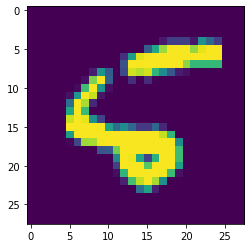

In [32]:
tm=x_test[8]
plt.imshow(tm[0])

In [33]:
image_5 = np.expand_dims(tm, axis=0)
pred = lenet.predict(image_5)
pred

array([[7.2950607e-16, 3.7620510e-12, 3.0182589e-13, 2.8799635e-11,
        2.6573263e-10, 9.9999249e-01, 1.8727884e-07, 1.9721901e-10,
        7.2180396e-06, 2.9309044e-09]], dtype=float32)

In [34]:
result = np.where(pred == np.amax(pred))[1][0]
result

5